In [121]:
# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))

import numpy as np
import os
import pandas as pd
import csv
from datetime import datetime, timedelta
import subprocess
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib notebook

# pandas display options
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.precision', 1)    # set number of significant digits to diplay n pandas

In [30]:
# Working on Subbasin file 
colnames_SUB = ['trash', 'SUB',  'GIS',  'MON',  'AREAkm2',  'PRECIPmm', 'SNOMELTmm',    'PETmm',    'ETmm', 'SWmm', 'PERCmm',   'SURQmm',   
            'GW_Qmm',   'WYLDmm',   'SYLDt/ha', 'ORGNkg/ha',    'ORGPkg/ha',    'NSURQkg/ha',   'SOLPkg/ha',    'SEDPkg/ha',    
            'LATQ(mm)', 'LATNO3kg/ha',  'GWNO3kg/ha',   'CHOLAmic/L',   'CBODUmg/L',    'DOXQmg/L', 'TNO3kg/ha',    'QTILEmm',  'TVAPkg/ha']


shed_name = "Fagaalu"

output_sub_file = os.path.join('..', shed_name, 'model', shed_name, 'Scenarios/Default/TxtInOut/', 'output.sub')

listo = []
with open(output_sub_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ', skipinitialspace=True)
    line_count = 0
    for row in csv_reader:
        listo.append(row)
    da_listo = listo[9:]        # cut off the headder line BS
data = da_listo            # just the good stuff


for i in data:
    splitit = i[3].split(".")               # this little blok is because SWAT Fd up the Mon column and stuck it onto the area col, why?
    i[3] = splitit[0]
    i.insert(4, float('0.' + splitit[-1]))  # the bugs and inconsistant formatting in this model are truely mind blowing...
    
df = pd.DataFrame(data, columns=colnames_SUB)    # make the data into a dataframe
del df['trash']                                  # remove random trach column
df = df.apply(pd.to_numeric)                     # make numbers numbers

# get date values onto the data, it has to split into individual dictionary of subbasins
Startdate = "20130101"
OGdate = datetime(year=int(Startdate[0:4]), month=int(Startdate[4:6]), day=int(Startdate[6:8]))

SUB_pile = {}

for i in df['SUB'].unique():
    keynam = "SUB_{}".format(i)
    SUB_pile[keynam] = df[df['SUB'] == i]
    SUB_pile[keynam] = SUB_pile[keynam] .reset_index(drop=True)    # make index start at 1
    SUB_pile[keynam]['date'] = pd.to_datetime(SUB_pile[keynam].index, unit='d', origin = OGdate )

In [115]:
# working on watout.dat file
shed_name = "Fagaalu"
output_sub_file = os.path.join('..', shed_name, 'model', shed_name, 'Scenarios/Default/TxtInOut/', 'watout.dat')

headde = ['Year',  'Day', 'FLOW_m3ps']
flow_df = pd.read_csv(output_sub_file, skiprows=6, skipinitialspace=True, sep='\s+', names=headde, usecols= [0,1,3])
flow_df.index = pd.to_datetime(flow_df['Year'] * 1000 + flow_df['Day'], format='%Y%j')
del flow_df['Year']; del flow_df['Day']
flow_df = flow_df.apply(pd.to_numeric)                     # make numbers numbers

<IPython.core.display.Javascript object>


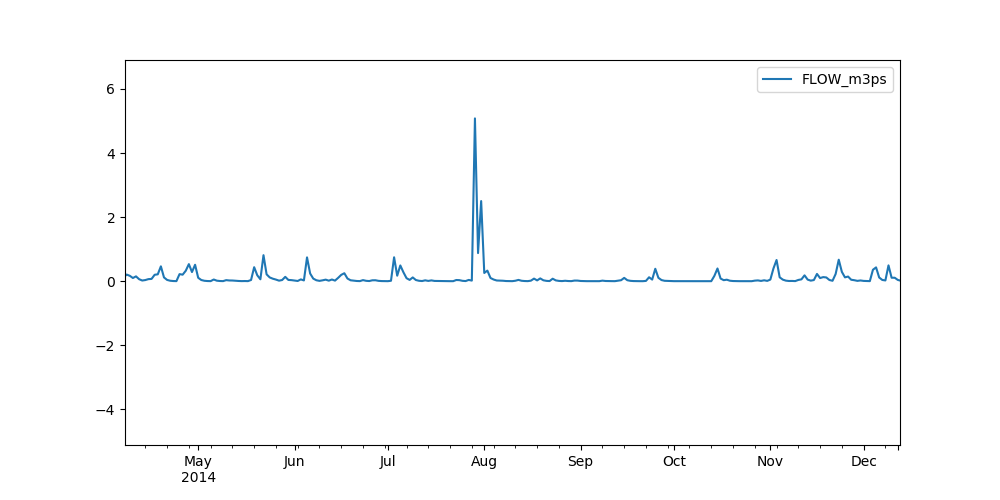

In [123]:
flow_df.plot(figsize = (10,5))